# Time Series


### The easiest way to visualize trends is by drawing trend lines.

       WeekOf  Hits
0  2004-01-04    53
1  2004-01-11    53
2  2004-01-18    54
3  2004-01-25    53
4  2004-02-01    52


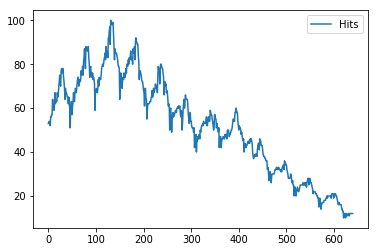

In [1]:
import pandas as pd
import numpy as np
from datetime import timedelta
import matplotlib.pyplot as plt
%matplotlib inline

# Import the data
df = pd.read_csv('google_trends.csv')

# Clean/Organize the data. 
df.columns = ['WeekOf', 'Hits']
print(df.head())
df.plot();

Next we need to compute a coefficient and intercept for our line. NumPy's polyfit method can do this.

Then define our polynomial function using that coefficient. We can do this on a single dimension using NumPy's poly1d method.

In [2]:
line_coef = np.polyfit(df.index,df['Hits'],1)
print(line_coef)

polynomial = np.poly1d(line_coef)
# The intercept is ~86.59, the slops is ~0.11
print(polynomial(0))
print(polynomial(1))

[-0.10841388 86.58979622]
86.58979621684865
86.48138233980062


### Now plot our trendline over the data

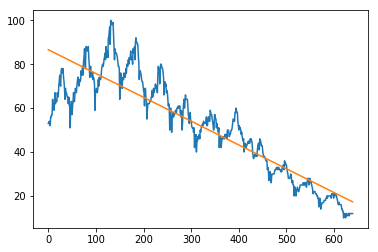

In [5]:
# Plot the time series
plt.plot(df.index, df['Hits'])
# Plot the least squares minimizing line
plt.plot(df.index, polynomial(df.index));

<a name="demo-autocor"></a>
## Autocorrelation 
In time series data, autocorrelation is a measure of _how correlated a variable is with itself_.

Specifically, autocorrelation measures how closely related earlier values are with values occurring later in time.

#### How do we compute Autocorrelation?


${\Huge R(k) = \frac{\operatorname{E}[(X_{t} - \mu)(X_{t-k} - \mu)]}{\sigma^2}}^*$

To compute autocorrelation, we fix a lag _k_ which is the delta between the given point and the prior point used to compute the [correlation](https://en.wikipedia.org/wiki/Pearson_product-moment_correlation_coefficient).

With a _k_ value of 1, we'd compute how correlated a value is with the prior one. With a _k_ value of 10, we'd compute how correlated a variable is with one 10 time points earlier.

$^*$ Note that this formula assumes *stationarity*, which we'll talk about shortly

### Guided practice

Let's look for trends, seasonality and autocorrelation in data made available by a German drugstore, Rossmann.

These data contains the daily sales made at the drugstore as well as whether a sale or holiday affected the sales data.


Because we are most interested in the `Date` column (which contains the date of sales for each store), we will make sure to process that as a `DateTime` type, and make it the index of our dataframe.


In [23]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
%matplotlib inline

plt.rcParams['figure.figsize'] = (16.0, 8.0)

data = pd.read_csv('rossmann.csv', 
                   skipinitialspace=True, 
                   low_memory=False)
data['Date'] = pd.to_datetime(data['Date'])
data = data.set_index('Date')
data.head()


,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
Date,,,,,,,,
2015-07-31,1,5,5263,555,1,1,0,1
2015-07-31,2,5,6064,625,1,1,0,1
2015-07-31,3,5,8314,821,1,1,0,1
2015-07-31,4,5,13995,1498,1,1,0,1
2015-07-31,5,5,4822,559,1,1,0,1


This allows us to easily filter by date.

In [24]:
data['Year'] = data.index.year
data['Month'] = data.index.month

data['2015-05'].head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month
Date,,,,,,,,,,
2015-05-31,1,7,0,0,0,0,0,0,2015,5
2015-05-31,2,7,0,0,0,0,0,0,2015,5
2015-05-31,3,7,0,0,0,0,0,0,2015,5
2015-05-31,4,7,0,0,0,0,0,0,2015,5
2015-05-31,5,7,0,0,0,0,0,0,2015,5


There are over a million sales data points in this dataset, so for some simple EDA we will focus on just one store.



In [25]:
store1_data = data[data['Store'] == 1]
store1_data.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month
Date,,,,,,,,,,
2015-07-31,1,5,5263,555,1,1,0,1,2015,7
2015-07-30,1,4,5020,546,1,1,0,1,2015,7
2015-07-29,1,3,4782,523,1,1,0,1,2015,7
2015-07-28,1,2,5011,560,1,1,0,1,2015,7
2015-07-27,1,1,6102,612,1,1,0,1,2015,7


#### Plotting the sales data

We want to know how sales change over time, and whether promotions or holidays affect sales. To start, we can compare the average sales on those events.

To compare sales on holidays, we'll use boxplots.

On state holidays the store is closed (which means there are 0 sales) -- so we need to cut those days out. (Contextual knowledge like this is always needed to truly explain time series phenomenon.)

> Check: can you think of any other special considerations we should make when tracking sales?



C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


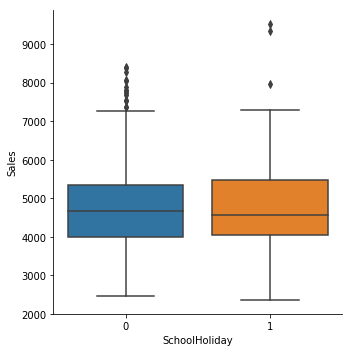

In [26]:
sns.factorplot(
    x='SchoolHoliday',
    y='Sales',
    data=store1_data[store1_data['Open']==1],
    kind='box'
);

**Check:** Now check to see if there is a difference affecting sales on promotion days.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


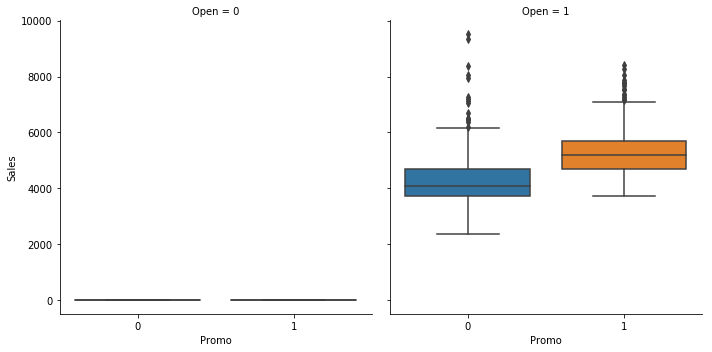

In [27]:
sns.factorplot(
    col='Open',
    x='Promo',
    y='Sales',
    data=store1_data,
    kind='box'
);


We can see that there _is_ a difference in sales on promotion days.

Why is it important to separate out days where the store is closed? Because there aren't any promotions on those days either, so including them will bias your sales data on days without promotions! Remember to think about the business logic as well as analyzing the raw data.

We may also want to compare sales across days of the week:

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


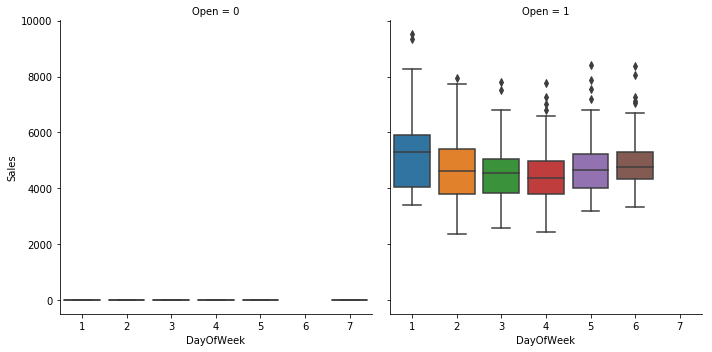

In [28]:
sns.factorplot(
    col='Open',
    x='DayOfWeek',
    y='Sales',
    data=store1_data,
    kind='box',
);

Lastly, we want to identify larger-scale trends in our data. How did sales change from 2014 to 2015? Were there any particularly interesting outliers in terms of sales or customer visits?

To plot the sales and customer visits over time:


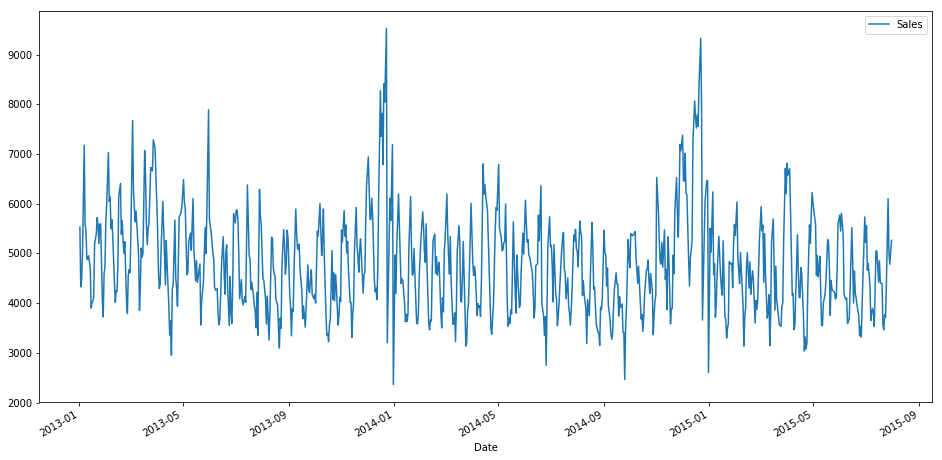

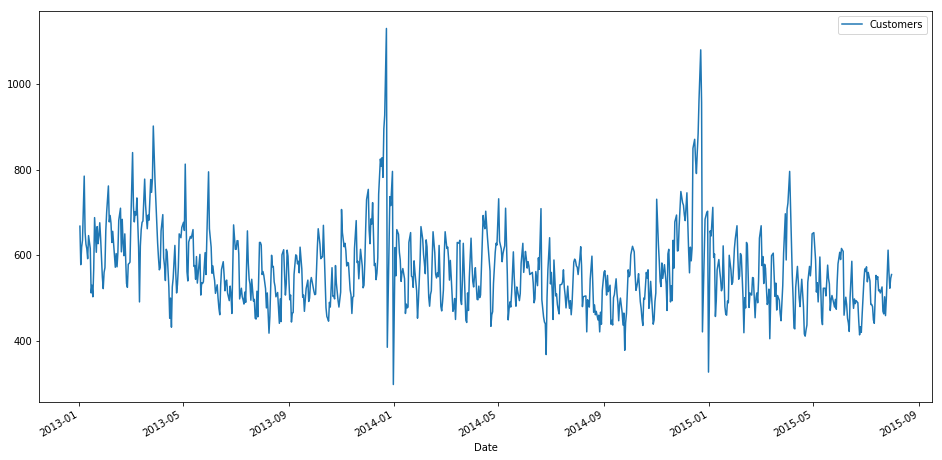

In [29]:
# Filter to days store 1 was open
store1_open_data = store1_data[store1_data['Open']==1]
store1_open_data[['Sales']].plot();
store1_open_data[['Customers']].plot();

We can see that there are large spikes of sales and customers towards the end of 2013 and 2014, leading into the first quarter of 2014 and 2015.

Let's use the index filtering to filter just to 2015 changes over time. This should make it easier to identify the holiday sales bump.

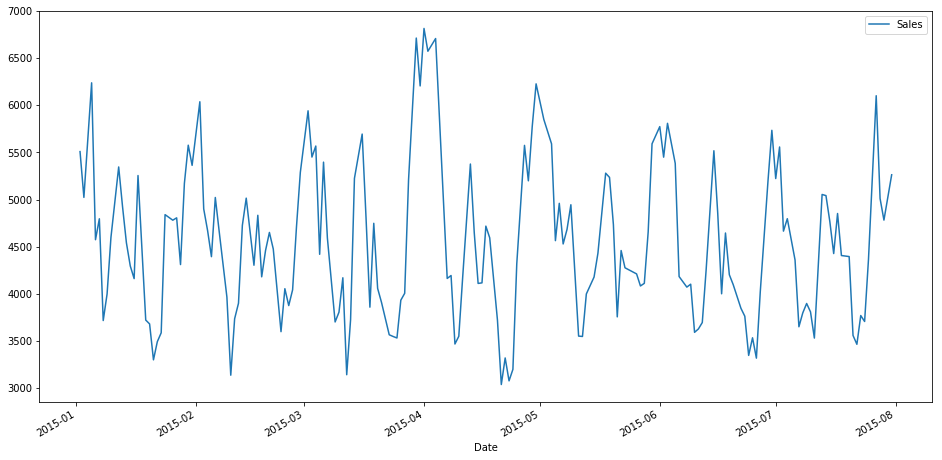

In [30]:
store1_data_2015 = store1_data['2015']
store1_data_2015[
    store1_data_2015.Open==1
][['Sales']].plot();

#### Computing Autocorrelation

To measure how much the sales are correlated with each other, we want to compute the _autocorrelation_ of the 'Sales' column.

Pandas' `autocorr` function takes one argument, `lag` - how many prior data points to use to compute the correlation. If we set the `lag` to 1, we compute the correlation between every point and the point directly preceding it. Setting `lag` to 10 would computes the correlation between every point and the point 10 days earlier.



In [31]:
## Try different lag values -- what do you expect to see?

store1_data['Sales'].autocorr(lag=10)

0.006307623893789396

### Just like with correlation between different variables, the data becomes more correlated as this number moves closer to 1.


#### Aggregates of sales over time

If we want to investigate trends over time in sales, as always, we will start by computing simple aggregates. We want to know: what were the mean and median sales in each month and year?

We can use `data.resample` on the whole dataset and provide as arguments:
    - The level on which to roll-up to, 'D' for day, 'W' for week, 'M' for month, 'A' for year
    - The aggregation to perform: 'mean', 'median', 'sum', etc.



In [32]:
data[['Sales']].resample('A', how=['median', 'mean'])


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  """Entry point for launching an IPython kernel.


Sales             
           median         mean
Date                          
2013-12-31   5598  5658.533675
2014-12-31   5794  5833.290704
2015-12-31   5916  5878.245380

In [33]:
# December 2013 and 2014 were the highest average sale months.
data[['Sales']].resample('M', how=['median', 'mean'])\
.sort_values(by=('Sales','mean'), ascending=False).head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  


Sales             
            median         mean
Date                           
2014-12-31  6915.0  6973.282456
2013-12-31  6566.0  6703.618140
2015-06-30  6042.0  6199.203976
2014-11-30  6337.5  6179.249661
2015-07-31  6085.0  6142.705511

- We often want to compare the sales data of a date to a smaller window.
- E.g. to understand holidays sales, we don't want to compare sales data in late December with the entire month, but to a few days immediately surrounding it.
- We can do this using **rolling averages**.

In pandas, we can compute rolling average using the `pd.rolling_mean` or `pd.rolling_median` functions.



This computes a rolling mean of sales using the sales on each day, the day preceding and the day following (window = 3, center=True).

In [40]:
# Resample to have the daily total over all stores
daily_store_sales = data[['Sales']].resample('D', how='sum')
#pd.rolling_mean(daily_store_sales, window=3, center=True).head()
daily_store_sales.rolling(3).mean().head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  


,Sales
Date,
2013-01-01,NaN
2013-01-02,NaN
2013-01-03,4.464961e+06
2013-01-04,6.645534e+06
2013-01-05,6.312789e+06


`rolling_mean` (as well as `rolling_median`) takes the series to aggregate as well as three important parameters:
    - `window` is the number of days to include in the average
    - `center` is whether the window should be centered on the date or use data prior to that date

You may first want to `resample` or group your data by a time-period. For example, our data is on a daily level by store, so may first want to average over stores. We can use `D` for day, `M` for month or `A` for year to average the values by those timeperiods.




We can use our index filtering to just look at 2015.




In [42]:
#pd.rolling_mean(daily_store_sales, window=3, center=True)['2015'].head()
daily_store_sales['2015'].rolling(3).mean().head()


,Sales
Date,
2015-01-01,NaN
2015-01-02,NaN
2015-01-03,4.613968e+06
2015-01-04,4.636312e+06
2015-01-05,5.883770e+06


Instead of plotting the full time series, we can plot the rolling mean instead, which smooths random changes in sales as well as removing outliers, helping us identify larger trends.




In [43]:
plt.rcParams['figure.figsize'] = (20.0, 10.0)
#pd.rolling_mean(daily_store_sales, window=10, center=True).plot()
daily_store_sales.rolling(10).mean().head()

,Sales
Date,
2013-01-01,NaN
2013-01-02,NaN
2013-01-03,NaN
2013-01-04,NaN
2013-01-05,NaN


As we discussed earlier, this averages all values in the window evenly, but we might want to weight closer values more. For example, with a centered weighted average of 10 days, we want to put additional emphasis on +/- 1 day versus +/- 10 days. One option to do that is the `ewma` function or `exponential weighted moving average` function.

```python
pd.ewma(daily_store_sales, span=10)
```

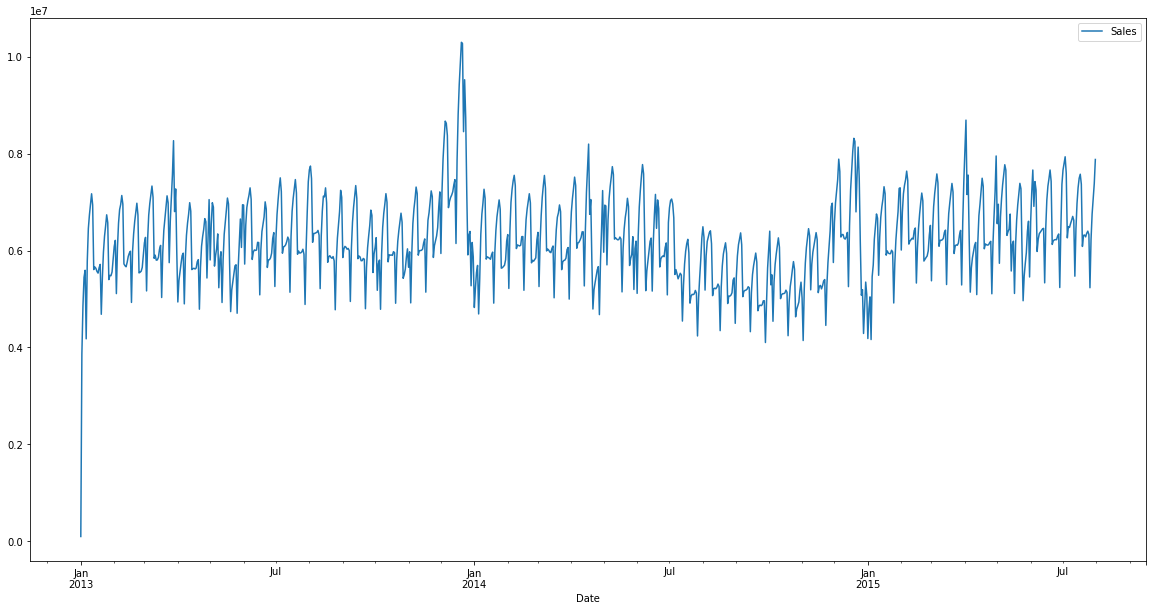

In [45]:
#pd.ewma(daily_store_sales, span=10).plot()
daily_store_sales.ewm(span=10).mean().plot()

#### Pandas Window functions

Pandas `rolling_mean` and `rolling_median` are only two examples of Pandas window function capabilities. Window functions operate on a set of N consecutive rows (i.e.: a window) and produce an output.

In addition to `rolling_mean` and `rolling_median`, there are `rolling_sum`, `rolling_min`, `rolling_max`... and many more.

Another common one is `diff`, which takes the difference over time. `pd.diff` takes one argument: `periods`, which measures how many rows prior to use for the difference.

For example, if we want to compute the difference in sales, day by day:




In [46]:
daily_store_sales.diff(periods=1).head()


,Sales
Date,
2013-01-01,NaN
2013-01-02,6852594.0
2013-01-03,-602009.0
2013-01-04,291134.0
2013-01-05,-687361.0


However, if wanted to compare the same day the prior week, we could set `periods=7`


In [47]:
daily_store_sales.diff(periods=7)

,Sales
Date,
2013-01-01,NaN
2013-01-02,NaN
2013-01-03,NaN
2013-01-04,NaN
2013-01-05,NaN
2013-01-06,NaN
2013-01-07,NaN
2013-01-08,8652202.0
2013-01-09,796774.0


The following plot of the month to month change (`diff`) in jobs from FiveThirtyEight helps identify the seasonal component to a number of retail jobs:

![](./assets/images/casselman-datalab-wsj2.png)


<a name="ind-practice"></a>

### Independent practice

1. Plot the distribution of sales by month and compare the effect of promotions.
2. Are sales more correlated with the prior date, a similar date last year, or a similar date last month?
3. Plot the 15 day rolling mean of customers in the stores.
4. Identify the date with largest drop in sales from the same date in the previous month.
5. Compute the total sales up until Dec. 2014.
6. When were the largest differences between 15-day moving/rolling averages? HINT: Using `rolling_mean` and `diff`




<a name="ind-practice-review"></a>

1. Plot the distribution of sales by month and compare the effect of promotions

```python
sb.factorplot(
    col='Open',
    hue='Promo',
    x='Month',
    y='Sales',
    data=store1_data,
    kind='box'
)
```





2. Are sales more correlated with the prior date, a similar date last year, or a similar date last month?

```python
# Compare the following:
average_daily_sales = data[['Sales', 'Open']].resample('D', how='mean')

average_daily_sales['Sales'].autocorr(lag=1)

average_daily_sales['Sales'].autocorr(lag=30)

average_daily_sales['Sales'].autocorr(lag=365)
```




3. Plot the 15 day rolling mean of customers in the stores:

```python
pd.rolling_mean(data[['Sales']], window=15, freq='D').plot()
```



4. Identify the date with largest drop in average store sales from the same date in the previous month:

```python
average_daily_sales = data[['Sales', 'Open']].resample('D', how='mean')
average_daily_sales['DiffVsLastWeek'] = average_daily_sales[['Sales']].diff(periods=7)

average_daily_sales.sort(['DiffVsLastWeek']).head
```

Unsurprisingly, this day is Dec. 25 and Dec. 26 in 2014 and 2015, when the store is closed and there are many sales in the preceding week. How about when the store is open?

```python
average_daily_sales[average_daily_sales.Open == 1].sort(['DiffVsLastWeek'])
```

The top values are Dec. 24th, but sales on 2013-12-09 and 2013-10-14 were on average 4k lower than the same day in the previous week.




5. Compute the total sales up until Dec. 2014:

```python
total_daily_sales = data[['Sales']].resample('D', how='sum')
pd.expanding_sum(total_daily_sales)['2014-12']
```

Note that this is **NOT**

```python
pd.expanding_sum(data['Sales'])['2014-12']
```

because we do **not** want to sum over our stores first.



6. When were the largest differences between 15-day moving/rolling averages?
HINT: Using `rolling_mean` and `diff`

```python
pd.rolling_mean(total_daily_sales, window=15).diff(1).sort('Sales')
```

Unsurprisingly, they occur at the beginning of every year after the holiday season.

<a name="conclusion"></a>
## Recap
- We use time series analysis to identify changes in values over time
- We want to identify whether changes are true trends, seasonal changes or something else
- Autocorrelations are a measure of how much a data point is dependent on previous data points
- Rolling means give us a local statistic of an average in time, smoothing out random fluctuations and removing outliers